# Set up utils function

In [ ]:
!pip install -qqq catalyst

     |████████████████████████████████| 444 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 125 kB 48.5 MB/s 


In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from catalyst import utils

sns.set(style="darkgrid", font_scale=1.4)
%config InlineBackend.figure_format = 'retina'

In [ ]:
def torchDataLoader(generate_data):
  X, y = generate_data(n_samples=1000, random_state=42, noise= 0.07)
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
  X_train_t = torch.from_numpy(X_train).to(torch.float32)
  y_train_t = torch.from_numpy(y_train).to(torch.float32)
  X_val_t = torch.from_numpy(X_val).to(torch.float32)
  y_val_t = torch.from_numpy(y_val).to(torch.float32)
  train_dataset = TensorDataset(X_train_t, y_train_t)
  val_dataset = TensorDataset(X_val_t, y_val_t)
  train_dataloader = DataLoader(train_dataset, batch_size=128)
  val_dataloader = DataLoader(val_dataset, batch_size=128)
  return train_dataloader, val_dataloader

In [ ]:
def train(model, epochs):
    losses = []
    max_epochs = epochs
    stop_it = False
    for epoch in range(max_epochs):
        utils.set_global_seed(42 + epoch)
        for it, (X_batch, y_batch) in enumerate(train_dataloader):
            optimizer.zero_grad()
            outp = model(X_batch)
            loss = loss_function(outp.flatten(), y_batch)
            loss.backward()
            losses.append(loss.detach().flatten()[0])
            optimizer.step()
            probabilities = torch.sigmoid(outp)
            preds = (probabilities>0.5).type(torch.long)
    return model, losses

# Challenge of Training Deep Learning
https://machinelearningmastery.com/a-gentle-introduction-to-the-challenge-of-training-deep-learning-neural-network-models/





- **Neural Nets Learn a Mapping Function**: 
    - A true mapping function exists to best map input variables to output variables and that a neural network model can do a reasonable job at approximating the true unknown underlying mapping function
    - We can describe the broader problem that neural networks solve as “function approximation.” They learn to approximate an unknown underlying mapping function given a training dataset. They do this by learning weights and the model parameters, given a specific network structure that we design.

- **Learning Network Weights Is Hard**:
    - Finding parameters for many machine learning algorithms involves solving a convex optimization problem: that is an error surface that is shaped like a bowl with a single best solution. *This is not the case for deep learning neural networks.*
    - It is not a simple bowl shape with a single best set of weights that we are guaranteed to find. Instead, there is a landscape of peaks and valleys with many good and many misleadingly good sets of parameters that we may discover.

- **Navigating the Non-Convex Error Surface**: 
    - Neural network models can be thought to learn by navigating a non-convex error surface.
    - Backpropagation refers to a technique from calculus to calculate the derivative (e.g. the slope or the gradient) of the model error for specific model parameters, allowing model weights to be updated to move down the gradient.
    - Stochastic gradient descent can be used to find the parameters for other machine learning algorithms, such as linear regression, and it is used when working with very large datasets, although if there are sufficient resources, then convex-based optimization algorithms are significantly more efficient.
- **Components of the Learning Algorithm**:
    - Loss Function. The function used to estimate the performance of a model with a specific set of weights on examples from the training dataset.
    - Weight Initialization. The procedure by which the initial small random values are assigned to model weights at the beginning of the training process.
    - Batch Size. The number of examples used to estimate the error gradient before updating the model parameters.
    - Learning Rate: The amount that each model parameter is updated per cycle of the learning algorithm.
    - Epochs. The number of complete passes through the training dataset before the training process is terminated.

# Configure Capacity With Nodes and Layers
https://machinelearningmastery.com/how-to-control-neural-network-model-capacity-with-nodes-and-layers/

*Including including the number of nodes in a layer and the number
of layers used to define the scope of functions that can be learned by the model*

- Neural network model capacity is controlled both by the number of nodes and the number of layers in the model.
- A model with a single hidden layer and a sufficient number of nodes has the capability of learning any mapping function, but the chosen learning algorithm may or may not be able to realize this capability.
- Increasing the number of layers provides a short-cut to increasing the capacity of the model with fewer resources, and modern techniques allow learning algorithms to successfully train deep models.

## Change Model Capacity With Nodes

We can see that as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better learn the training dataset. This plot shows the direct relationship between model capacity, as defined by the number of nodes in the hidden layer and the model’s ability to learn.
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plot-of-Cross-Entropy-Loss-Over-Training-Epochs-for-an-MLP-on-the-Training-Dataset-for-the-Blobs-Multi-Class-Classification-Problem-When-Varying-Model-Nodes.png" />

## Change Model Capacity With Layers
- Increasing the number of layers can often greatly increase the capacity of the model, acting like a computational and learning shortcut to modeling a problem.
- The danger is that a model with more capacity than is required is likely to overfit the training data, and as with a model that has too many nodes, a model with too many layers will likely be unable to learn the training dataset, getting lost or stuck during the optimization process.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plot-of-Cross-Entropy-Loss-Over-Training-Epochs-for-an-MLP-on-the-Training-Dataset-for-the-Blobs-Multi-Class-Classification-Problem-When-Varying-Model-Layers.png" />

# Control the Stability With Batch Size
https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

*Including exploring whether variations such as batch, stochastic
(online), or minibatch gradient descent are more appropriate*

## Batch and an Epoch
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

- **What Is a Sample?**: A sample is a single row of data. It contains inputs that are fed into the algorithm and an output that is used to compare to the prediction and calculate an error.
- **What Is a Batch?**: The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
    - Batch Gradient Descent. Batch Size = Size of Training Set
    - Stochastic Gradient Descent. Batch Size = 1
    - Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

- **What Is a Epoch?**: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
- **What Is the Difference Between Batch and Epoch?**: 
    - The batch size is a number of samples processed before the model is updated.
    - The number of epochs is the number of complete passes through the training dataset.

- Batch Gradient Descent: We can see that the model is relatively slow to learn this problem, converging on a solution after about 100 epochs after which changes in model performance are minor.
- Stochastic Gradient Descent: The plot shows the unstable nature of the training process with the chosen configuration. The poor performance and violent changes to the model suggest that the learning rate used to update weights after each training example may be too large and that a smaller learning rate may make the learning process more stable.
- Minibatch Gradient Descent: The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically, the model learns fast and has noisy updates but also stabilizes more towards the end of the run, more so than stochastic gradient descent.

The plots show that small batch results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plots-of-Classification-Accuracy-on-Train-and-Test-Datasets-With-Different-Batch-Sizes.png" />


# Configure What to Optimize With Loss Functions
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


## Loss and Loss Functions
https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

*Including understanding the way different loss functions
must be interpreted and whether an alternate loss function would be appropriate for your
problem*

## Regression Loss Functions


### Mean Absolute Error Loss

<img src="https://i.imgur.com/19LNbyQ.jpg" />

### Mean Squared Error Loss

<img src="https://miro.medium.com/max/1198/1*BtVajQNj29LkVySEWR_4ww.png" />

### Mean Squared Logarimth Error Loss

- There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.
- First calculate the natural logarithm of each of the predicted values, then calculate the mean squared error

<img src="https://hrngok.github.io/images/cost.jpg" />
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-plots-of-Mean-Squared-Logistic-Error-Loss-and-Mean-Squared-Error-over-Training-Epochs.png"/>

## Binary Classification Loss Functions

### Binary Cross-Entropy Loss

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

<img src="https://chris-said.io/assets/2020_cross_entropy/cross-entropy.png"/>

### Hinge Loss
https://towardsdatascience.com/a-definitive-explanation-to-hinge-loss-for-support-vector-machines-ab6d8d3178f1

- The hinge loss encourage examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class value
- The target values are in the set {-1, 1} (change y from {0,1} to {-1,1} )
- This means that the loss in equation 1 is always non-negative. 
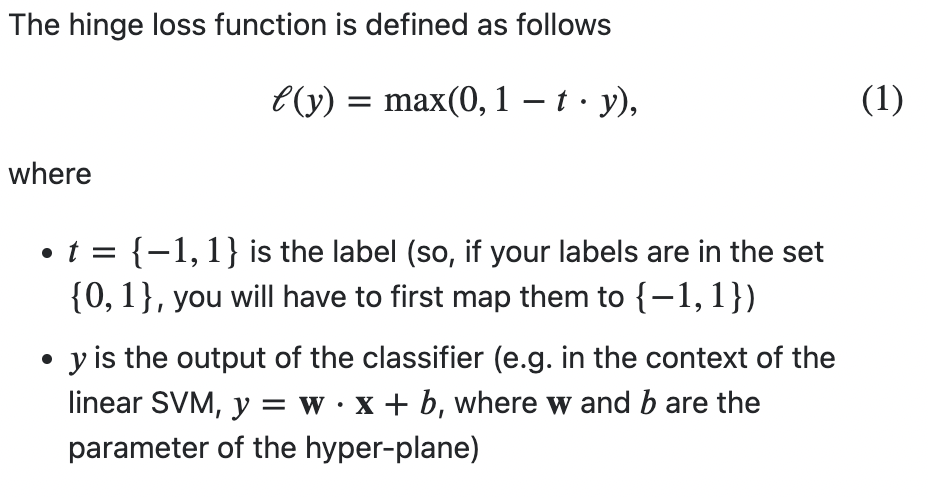
<img src="https://miro.medium.com/max/536/1*wGKly7ayUgU1bVOF9Jg8Dg.png" />


### Squared Hinge Loss
- the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.
- the target variable must be modified to have values in the set {-1, 1}.
<img src="https://cvstuff.files.wordpress.com/2014/11/losses.png"/>

## Multi-Class Classification Loss Functions

### Categorical Cross-Entropy Loss
https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451
- Categorical Cross-Entropy Loss produces a one-hot array containing the probable match for each category,

<img src="https://miro.medium.com/max/1400/1*ngGdMBNkF1U0-DJImomQvg.png"/>

### Sparse Categorical Cross-Entropy Loss
https://fmorenovr.medium.com/sparse-categorical-cross-entropy-vs-categorical-cross-entropy-ea01d0392d28

-A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

- For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

- sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.
- Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.

### Kullback Leibler Divergence Loss

- The Kullback-Leibler Divergence,or “KL Divergence” for short, is a measure of how one probability distribution differs from a baseline distribution.
- This means that, the closer p(y) gets to q(y), the lower the divergence and, consequently, the cross-entropy, will be.
- the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input
<img src="https://miro.medium.com/max/1238/1*WGUAYepfkWSKj9RZpQE2Jw.png"/>

# Configure Speed of Learning With Learning Rate
https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/


## Understand the Impact of Learning Rate
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

*Including understanding the effect of different learning rates
on your problem and whether modern adaptive learning rate methods such as Adam would
be appropriate*

## Learning Rate Dynamics

The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7.

We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased. With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plots-of-Train-and-Test-Accuracy-for-a-Suite-of-Learning-Rates-on-the-Blobs-Classification-Problem.png" />

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Momentum Dynamics
Momentum can smooth the progression of the learning algorithm that, in turn, can accelerate the training process.

We can see that the addition of momentum does accelerate the training of the model. Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs as opposed to 200 training epochs when momentum is not used.

In all cases where momentum is used, the accuracy of the model on the holdout test dataset appears to be more stable, showing less volatility over the training epochs.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plots-of-Train-and-Test-Accuracy-for-a-Suite-of-Momentums-on-the-Blobs-Classification-Problem.png" />

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Learning rate Scheduler

## Learning Rate Decay
https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

Learning rate decay is a technique for training modern neural networks. It starts training the network with a large learning rate and then slowly reducing/decaying it until local minima is obtained. It is empirically observed to help both optimization and generalization.

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance. The smaller decay values do result in better performance, with the value of 1E-4 perhaps causing in a similar result as not using decay at all.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plots-of-Train-and-Test-Accuracy-for-a-Suite-of-Decay-Rates-on-the-Blobs-Classification-Problem.png" />

In [ ]:
decayRate = 0.001
my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=my_optim, gamma=decayRate)

for e in epochs:
  scheduler.step()
  print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
  if epoch % 5 == 0:print()
  

## Drop Learning Rate on Plateau

The ReduceLROnPlateau will drop the learning rate by a factor after no change in a monitored metric for a given number of epochs.

The patience in the ReduceLROnPlateau controls how often the learning rate will be dropped.

The plot shows that the patience values of 2 and 5 result in a rapid convergence of the model, perhaps to a sub-optimal loss value. In the case of a patience level of 10 and 15, loss drops reasonably until the learning rate is dropped below a level that large changes to the loss can be seen. This occurs halfway for the patience of 10 and nearly the end of the run for patience 15.


<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Line-Plots-of-Training-Loss-Over-Epochs-for-Different-Patience-Values-Used-in-the-ReduceLROnPlateau-Schedule.png" />

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min')
for epoch in range(10):
    train(...)
    val_loss = validate(...)
    # Note that step should be called after validate()
    scheduler.step(val_loss)

## Adaptive and Cyclical Learning Rates

https://towardsdatascience.com/adaptive-and-cyclical-learning-rates-using-pytorch-2bf904d18dee

- Adaptive Optimizers
  - Adagrad: scale the lr for each parameter based on the past history of the gradient (Large gradients -> smaller alpha). The downside though: Learning rate can diminish very quickly
  - Adadelta: continues on Adagrad, but with new tricks: only the past w gradients are stored instead of the entire history, and the (now limited) history is stored as a decaying average.
  - RMSProp: kinda the same but RMSProp divides the LR by an exponentially decaying average of squared gradients.
  - Adam: storing the historic sum of squared gradients, calculates an exponential decaying average of past gradients (similar to momentum)
  - Adamax: Trick applied to the moving avarage of the squared gradients v(t) -> apply infinity-norm ℓ∞ to obtain a new, norm-constrained vector v(t), plug this into Adam

- Cyclical Learning Rate: varying learning rate between an upper and a lower bound in a triangular fashion:
  - step size:  how many epochs will the LR go up from the lower bound, up to the upper bound.
  - max lr =the highest LR in the schedule.
  - base lr =  the lowest LR in the schedule




In [ ]:
def cyclical_lr(stepsize, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [ ]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1.)
step_size = 4*len(train_loader)
clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])

In [ ]:
# Update LR
for i in range(lr_find_epochs):
    scheduler.step()
    lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr_find_lr.append(lr_step)

# Stabilize Learning With Data Scaling
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

*Including the sensitivity that small network weights have to
the scale of input variables and the impact of large errors in the target variable have on
weight updates*

### Scale Input/ Output Variable

- The input variable are taken from input or hidden layer that to make predict
- The Input should be small in the range 0 - 1
- ensure that the scale of your output variable matches the scale of the activation function (transfer function) on the output layer of your network

### Data Scaling Method

#### Data Normalization: 
Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

- Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function.
- Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.
- Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.

#### Data Standardization: 
Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

These results highlight that it is important to actually experiment and confirm the results of data scaling methods rather than assuming that a given data preparation scheme will work best based on the observed distribution of the data.

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/11/Box-and-Whisker-Plots-of-Mean-Squared-Error-With-Unscaled-Normalized-and-Standardized-Input-Variables-for-the-Regression-Problem.png" />

In [ ]:
x = torch.randn(10, 5) * 10

scaler = StandardScaler()
arr_norm = scaler.fit_transform(x.numpy())

torch.allclose(x, torch.from_numpy(arr_norm))

# Fix Vanishing Gradients With ReLU
https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

*Prevent the training of deep multiple-layered networks causing
layers close to the input layer to not have their weights updated; that can be addressed using
modern activation functions such as the rectified linear activation function*

## Introduction to the Rectified Linear Unit (ReLU)
https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

- Linear activation functions is very easy to train, but cannot learn complex mapping functions.
- A general problem with both the sigmoid and tanh functions is that they saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively.
- Error is back propagated through the network and used to update the weights. The amount of error decreases dramatically with each additional layer through which it is propagated, given the derivative of the chosen activation function. This is called the vanishing gradient problem
- Vanishing gradients make it difficult to know which direction the parameters should move to improve the cost function
- an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned -> ReLU





# Fix Exploding Gradients With Gradient Clipping
https://machinelearningmastery.com/how-to-avoid-exploding-gradients-in-neural-networks-with-gradient-clipping/

*Large weight updates cause a numerical overflow or underflow
making the network weights take on a NaN or Inf value; that can be addressed using
gradient scaling or gradient clipping*

It is possible for the updates to the weights to be so large that the weights either overflow or underflow their numerical precision. In practice, the weights can take on the value of an “NaN” or “Inf” when they overflow or underflow and for practical purposes the network will be useless from that point forward, forever predicting NaN values as signals flow through the invalid weights.

#### Gradient Norm Scaling
Gradient norm scaling involves changing the derivatives of the loss function to have a given vector norm when the L2 vector norm (sum of the squared values) of the gradient vector exceeds a threshold value.

For example, we could specify a norm of 1.0, meaning that if the vector norm for a gradient exceeds 1.0, then the values in the vector will be rescaled so that the norm of the vector equals 1.0.



In [ ]:
epochs=10
for epoch in range(epochs):
      total_loss = 0.0
      total_acc=0.0
      for i, batch in enumerate(train_iterator):
            (feature, batch_length), label = batch.comment_text, batch.toxic
            
            optimizer.zero_grad()
            
            output = model(feature, batch_length).squeeze() 
            # print(output)
            
            loss = loss_function(output, label)
            acc=model_accuracy(output,label)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0, norm_type=2)
            optimizer.step()

            total_loss += loss.item()
            total_acc+=acc.item() 
      
      print(f"loss on epoch {epoch} = {total_loss/len(train_iterator)}")
      print(f"accuracy on epoch {epoch} = {total_acc/len(train_iterator)}")

#### Gradient Value Clipping

Gradient value clipping involves clipping the derivatives of the loss function to have a given value if a gradient value is less than a negative threshold or more than the positive threshold.

For example, we could specify a norm of 0.5, meaning that if a gradient value was less than -0.5, it is set to -0.5 and if it is more than 0.5, then it will be set to 0.5.

In [ ]:
nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)

# Accelerate Learning With Batch Normalization
https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

## Introduction to Batch Normalization
https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

Batch normalization provides an elegant way of reparametrizing almost any deep network. The reparametrization significantly reduces the problem of coordinating updates across many layers.

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these statistics to perform the standardization.

BatchNorm2d is used in features extraction and BatchNorm1d is used in classifier

In [ ]:
"""
nn.BatchNorm2d 34 only accepts 4D inputs 
inputs are [batch, ch, h, w] (4D) 
"""
torch.nn.BatchNorm2d(n_output)

"""
in classifier we have Linear layers which accept [batch, length] 
or [batch, channel, length] (2D/3D) so we need BatchNorm1d.
"""
torch.nn.BatchNorm1d(n_output)

# Deeper Models With Greedy Layer-Wise Pretraining
https://machinelearningmastery.com/greedy-layer-wise-pretraining-tutorial/

Code Example :https://github.com/christianversloot/machine-learning-articles/blob/main/greedy-layer-wise-training-of-deep-networks-a-pytorch-example.md

*Where layers are added one at a time to a model,
learning to interpret the output of prior layers and permitting the development of much
deeper models: a milestone technique in the field of deep learning*

- Pretraining: involves adding a new hidden layer to a model and refitting
- Layer-wise: allowed newly added model to learn the inputs from the exits hidden layer, while keep the weights for the exitsting hidden layers fixed
- Greedy layer-wise pretraining is an important milestone in the history of deep learning, that allowed the early development of networks with more hidden layers than was previously possible.

# Jump-Start Training With Transfer Learning
https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/

*Where a model is trained on a different, but somehow related,
predictive modeling problem and then used to seed the weights or used wholesale as a
feature extraction model to provide input to a model trained on the problem of interest*

<img src="https://i.stack.imgur.com/BiClc.png" />

There are two main approaches to implementing transfer learning; they are:

- In the fine-tuning strategy all weights are changed when training on the new task (except for the weights of the last layers for the original task)
- Fine-tuning is a multi step process:
  1. Freezing all layers in the body of the network and training the layer head
  2. Freezing all layers, training the layer head, and then unfreezing the body and training that too
  3. Simply leaving all layers unfrozen and training them all together


In [ ]:
# load up the ResNet50 model
model = resnet50(pretrained=True)
numFeatures = model.fc.in_features
# loop over the modules of the model and set the parameters of
# batch normalization modules as not trainable
for module, param in zip(model.modules(), model.parameters()):
	if isinstance(module, nn.BatchNorm2d):
		param.requires_grad = False
# define the network head and attach it to the model
headModel = nn.Sequential(
	nn.Linear(numFeatures, 512),
	nn.ReLU(),
	nn.Dropout(0.25),
	nn.Linear(512, 256),
	nn.ReLU(),
	nn.Dropout(0.5),
	nn.Linear(256, len(trainDS.classes))
)
model.fc = headModel
# append a new classification top to our feature extractor and pop it
# on to the current device
model = model.to(config.DEVICE)

- Feature extraction strategy only the weights of the newly added last layers (mean participation of outputs from modelchange during the training phase)
- Since we’ll be using ResNet for feature extraction, and therefore no actual “learning” needs to take place in the body of the network, we freeze all layers in the body of the network
- From there, we create a new FC layer head that consists of a single FC layer. Effectively, this layer, when trained with categorical cross-entropy loss, will serve as our surrogate softmax classifier.

In [ ]:
# load up the ResNet50 model
model = resnet50(pretrained=True)
# since we are using the ResNet50 model as a feature extractor we set
# its parameters to non-trainable (by default they are trainable)
for param in model.parameters():
	param.requires_grad = False
# append a new classification top to our feature extractor and pop it
# on to the current device
modelOutputFeats = model.fc.in_features
model.fc = nn.Linear(modelOutputFeats, len(trainDS.classes))
model = model.to(config.DEVICE)